# Employee Retention Analysis
----
Employees are the life blood of the company. Therefore turnover is very costly to the company. I would like to analyze this hr data set to see how to retain employees

First I start with importing the necessary programs and establish a file path to the proper data set.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

%matplotlib inline

file_path = ('human-resources-analytics/HR_comma_sep.csv')

In [2]:
pd.read_csv(file_path)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [3]:
df = pd.read_csv(file_path)

The dateset had some confusion column names and even mispelled month, so I went ahead to rename some columns into simpler names.

In [4]:
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'number_project': 'project_count',
                        'average_montly_hours': 'average_monthly_hours',
                        'time_spend_company': 'years_at_company',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [5]:
df.describe()

,satisfaction,last_evaluation,project_count,average_monthly_hours,years_at_company,Work_accident,turnover,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Since I was investigating turnover rate I decided to see the how many people that worked for the company ultimately left.

I divided the number of turnovers by the total number of employees in the dateset.

In [6]:
turnover_rate = df.turnover.value_counts() / len(df)
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

The turnover rate is rather high at approximately 24%, almost the quarter of the workforce. Next I wanted to see if the high turnover came from a specific department within the company so I used df.groupby to find the total number of employee turnover grouped by departmen and divided that by the total number of employees, grouped by deparment to get the turnover rate in each department.

In [7]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [8]:
df.groupby(['department']).sum()['turnover']

department
IT              273
RandD           121
accounting      204
hr              215
management       91
marketing       203
product_mng     198
sales          1014
support         555
technical       697
Name: turnover, dtype: int64

In [9]:
df.groupby(['department']).sum()['turnover']/df['department'].value_counts()

IT             0.222494
RandD          0.153748
accounting     0.265971
hr             0.290934
management     0.144444
marketing      0.236597
product_mng    0.219512
sales          0.244928
support        0.248991
technical      0.256250
dtype: float64

The least amount of turnover came from the management department and R&D while the rest of the departments suffered from over 20% turnover in each department.

<function matplotlib.pyplot.title>

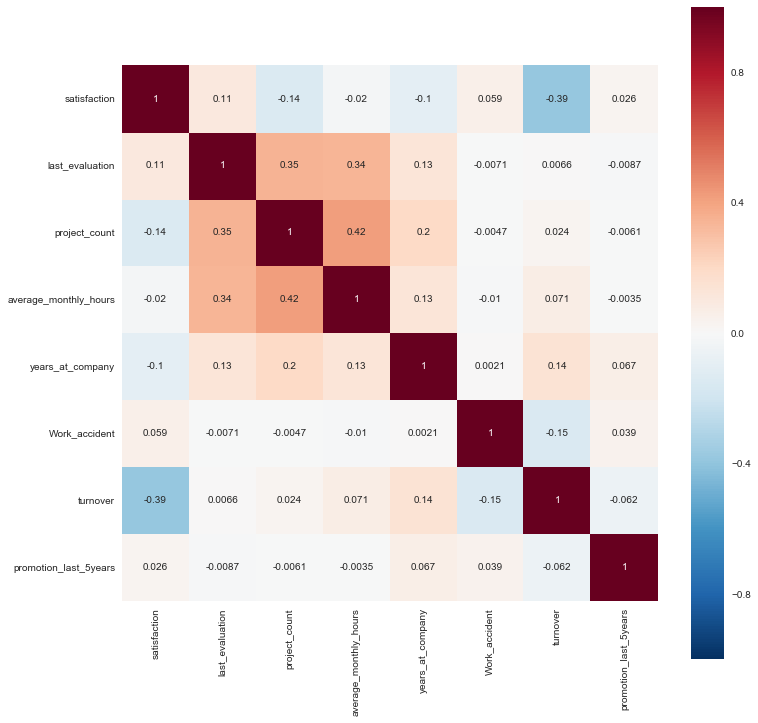

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), vmax=1, square=True,annot=True)

plt.title

In [11]:
df.dtypes

satisfaction             float64
last_evaluation          float64
project_count              int64
average_monthly_hours      int64
years_at_company           int64
Work_accident              int64
turnover                   int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [12]:
df[['turnover']]

,turnover
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [13]:
df1 = df[['turnover']]

In [14]:
df1 = list(df['turnover'].value_counts().index)

In [15]:
df1

[0, 1]

In [16]:
df['turnover'].tolist()

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [17]:
df[['satisfaction',
   'last_evaluation',
   'projectCount',
   'average_monthly_hours',
   'years_at_company',
   'Work_accident',
   'promotion_last_5years',
   'department',
   'salary'
  ]]

KeyError: "['projectCount'] not in index"

In [ ]:
df2 = df[['satisfaction',
   'last_evaluation',
   'projectCount',
   'average_monthly_hours',
   'years_at_company',
   'Work_accident',
   'promotion_last_5years',
   'department',
   'salary'
  ]]

In [ ]:
df[['satisfaction',
   'last_evaluation',
   'projectCount',
   'average_monthly_hours',
   'years_at_company',
   'Work_accident',
   'promotion_last_5years',
   'department',
   'salary'
  ]]

In [ ]:
list(df2)

In [ ]:
list[df]

In [ ]:
df2 = list(df['satisfaction'].value_counts().index)

In [ ]:
y = df['turnover'].values
x = df[['satisfaction',
   'last_evaluation',
   'projectCount',
   'average_monthly_hours',
   'years_at_company',
   'Work_accident',
   'promotion_last_5years',
   'department',
   'salary'
  ]].values

poly = PolynomialFeatures
poly.fit(x, y)

plt.scatter(x,y)